In [1]:
import pandas as pd
import json
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import scale
from statsmodels.nonparametric.kde import KDEUnivariate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVC

In [4]:
def box_plot(dataframe, col_list_float, plot_kind):
    """
    This function generates boxplots to show distribution and outliers of various parameters
    """
    
   
    x_val = 1
    y_val = len(col_list_float)
        
    if len(dataframe['model_year'].unique()) ==1:
        title_year = dataframe['model_year'].min()
    else:
        title_year = f'{dataframe["model_year"].min()} - {dataframe["model_year"].max()}'
        
    fig1, axes = plt.subplots(x_val,y_val , sharey=True, figsize=(18,6))
    
    k=0
    for i in range(0,x_val):
        for j in range(0,y_val):

            variable= col_list_float[k].lower()
            if plot_kind=="box":
                sns.boxplot(ax=axes[j], data=dataframe, x=variable)
                fig1.suptitle(f'Outlier identification by vehicle class {title_year}')
            elif plot_kind=="hist":
                sns.histplot(ax=axes[j], data=dataframe, x=variable,bins=10)
                fig1.suptitle(f'Distribution of data {title_year}')
            k+=1
    plt.show()

In [45]:
def generate_count_plots_by_feature(dataframe,feature):
    
    models = dataframe.groupby(feature).count()['model_year'].reset_index().rename(columns={"model_year":"count"}).sort_values(by="count", ascending=False)
    plt.rcParams["figure.figsize"] = (20,3)
    plt.bar(x = models[feature], height = models['count'])
    plt.xticks(rotation=90)
    plt.xlabel("Make")
    plt.ylabel("Frequency")
    plt.title(f"Frequency of {feature.replace('_',' ')} (2022 - 1995)")
    plt.show()

In [42]:
folder = "C:/Users/Laura GF/Documents/GitHub/machine-learning-capstone/data/"
raw_data = f'{folder}raw-data/'
clean_data = f'{folder}clean-data/'


file_name_2022_1995 = "1995_2022_vehicle_fuel_consumption.csv"
pure_electric = "Battery-electric_vehicles_2012-2022_(2022-05-16).csv"
hybric_vehicle = "Plug-in_hybrid_electric_vehicles_2012-2022_(2022-03-28).csv"

master_df = pd.read_csv(Path(folder + "clean-data",f'{file_name_2022_1995}'))
electric_df = pd.read_csv(Path(folder + "clean-data",f'{pure_electric}'))
hybrid_df = pd.read_csv(Path(folder + "clean-data",f'{hybric_vehicle}'))

In [40]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26159 entries, 0 to 26158
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   model_year                     26159 non-null  int64  
 1   make_                          26159 non-null  object 
 2   model.1_                       26159 non-null  object 
 3   vehicleclass_                  26159 non-null  object 
 4   enginesize_(l)                 26159 non-null  float64
 5   cylinders_                     26159 non-null  float64
 6   transmission_                  26159 non-null  object 
 7   fuel_type                      26159 non-null  object 
 8   fuelconsumption_city(l/100km)  26159 non-null  float64
 9   fuelconsumption_hwy(l/100km)   26159 non-null  float64
 10  fuelconsumption_comb(l/100km)  26159 non-null  float64
 11  fuelconsumption_comb(mpg)      26159 non-null  int64  
 12  co2emissions_(g/km)            26159 non-null 

In [43]:
electric_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   model_year                       310 non-null    int64  
 1   make_                            310 non-null    object 
 2   model.1_                         310 non-null    object 
 3   vehicleclass_                    310 non-null    object 
 4   motor_(kw)                       310 non-null    int64  
 5   transmission_                    310 non-null    object 
 6   fuel_type                        310 non-null    object 
 7   consumption_city(kwh/100km)      310 non-null    float64
 8   fuelconsumption_hwy(kwh/100km)   310 non-null    float64
 9   fuelconsumption_comb(kwh/100km)  310 non-null    float64
 10  fuelconsumption_city(le/100km)   310 non-null    float64
 11  fuelconsumption_hwy(le/100km)    310 non-null    float64
 12  fuelconsumption_comb(l

In [44]:
hybrid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   model_year                     217 non-null    int64  
 1   make_                          217 non-null    object 
 2   model.1_                       217 non-null    object 
 3   vehicleclass_                  217 non-null    object 
 4   motor_(kw)                     217 non-null    int64  
 5   enginesize_(l)                 217 non-null    float64
 6   cylinders_                     217 non-null    float64
 7   transmission_                  217 non-null    object 
 8   fuel_type1                     217 non-null    object 
 9   consumption_combinedle/100km   217 non-null    object 
 10  range1_(km)                    217 non-null    int64  
 11  recharge_time(h)               217 non-null    float64
 12  fuel.1_type2                   217 non-null    obj

## Exploratory data analysis - fuel only vehicles

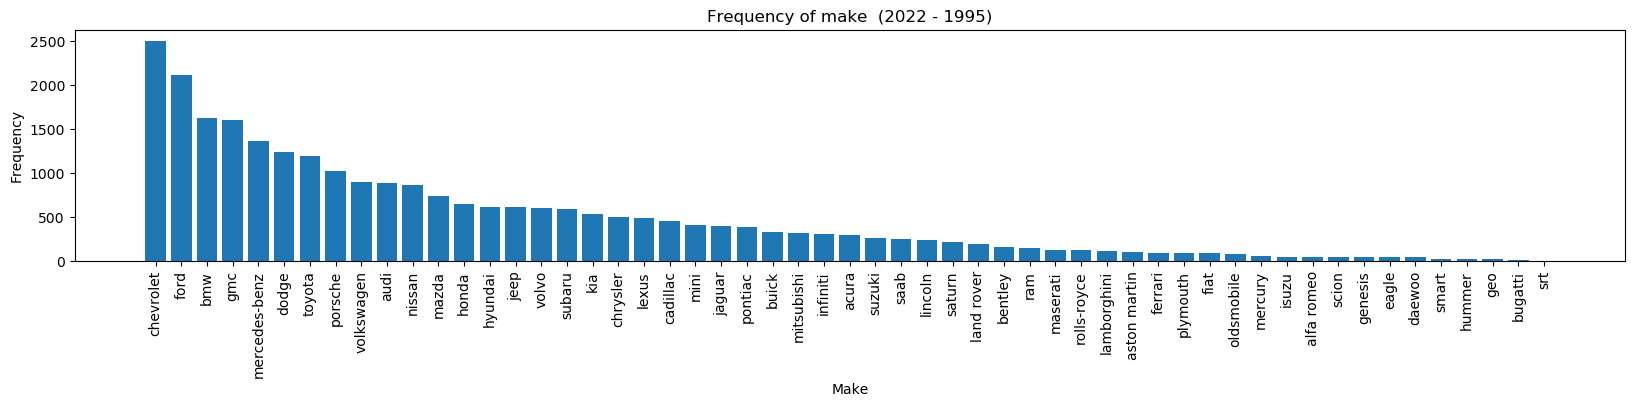

In [46]:
generate_count_plots_by_feature(master_df, "make_")

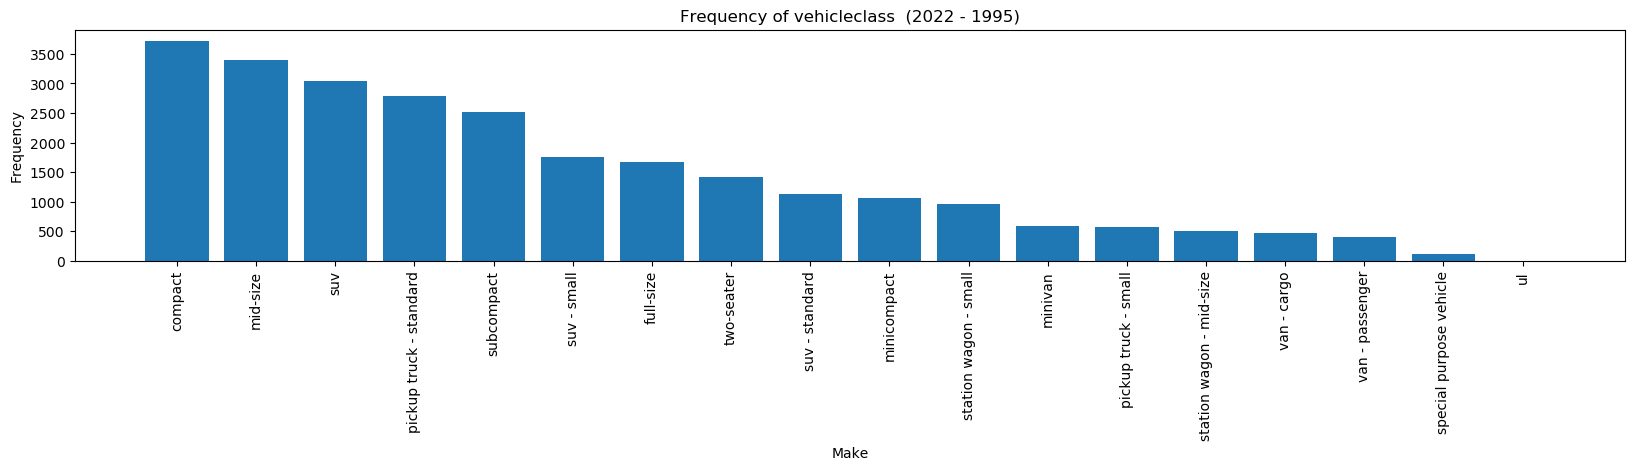

In [27]:
generate_count_plots_by_feature("vehicleclass_")

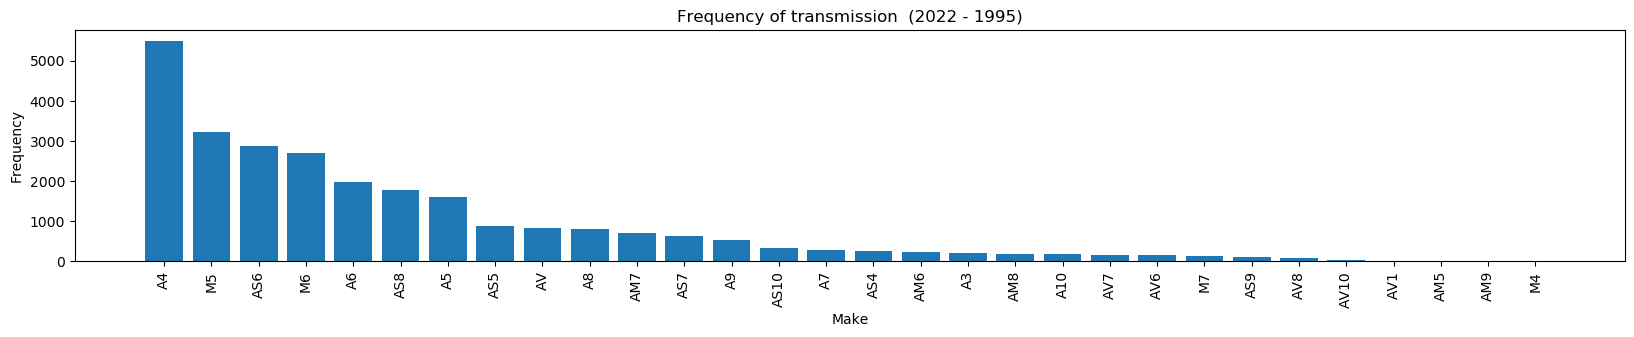

In [28]:
generate_count_plots_by_feature("transmission_")

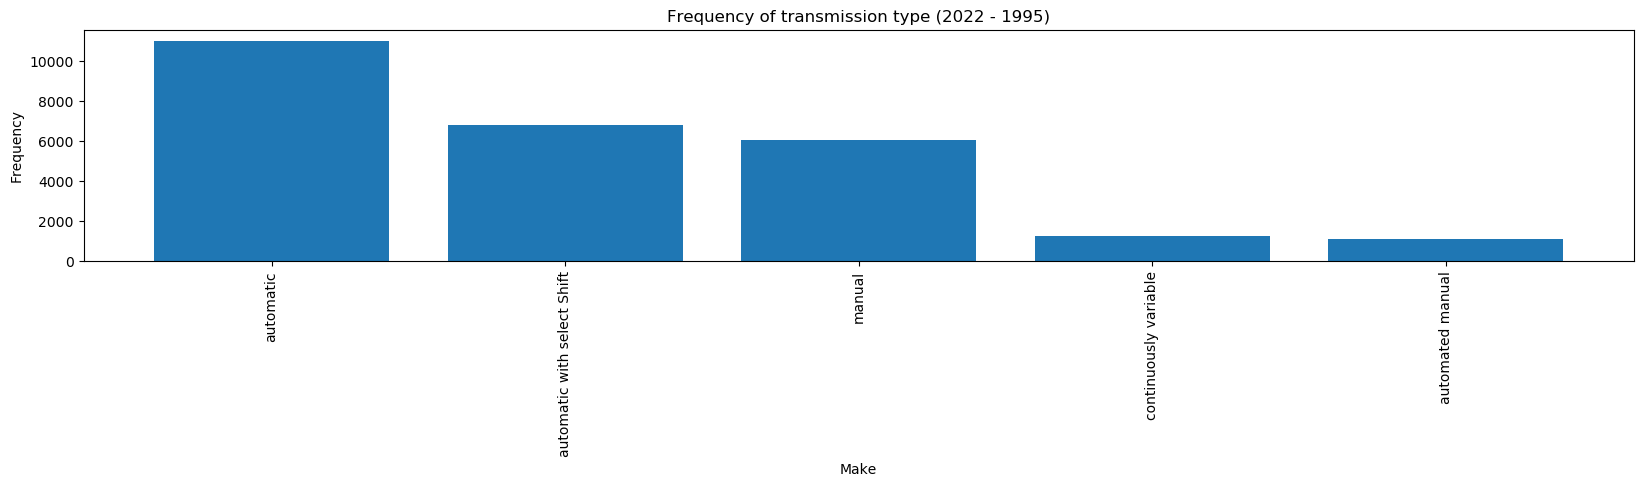

In [29]:
generate_count_plots_by_feature("transmission_type")

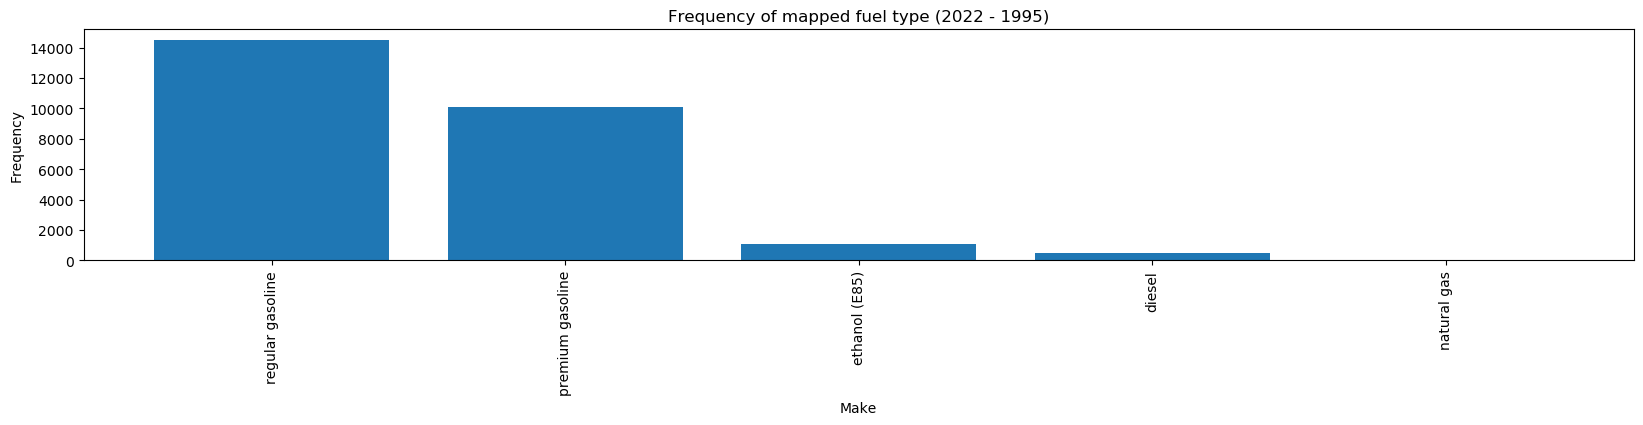

In [30]:
generate_count_plots_by_feature("mapped_fuel_type")

In [34]:
fuel_info = [
              'fuelconsumption_city(l/100km)','fuelconsumption_hwy(l/100km)',	
              'fuelconsumption_comb(l/100km)',
                  ]     

engine_info  = ['enginesize_(l)','cylinders_','co2_rating','co2emissions_(g/km)','smog_rating','number_of_gears']

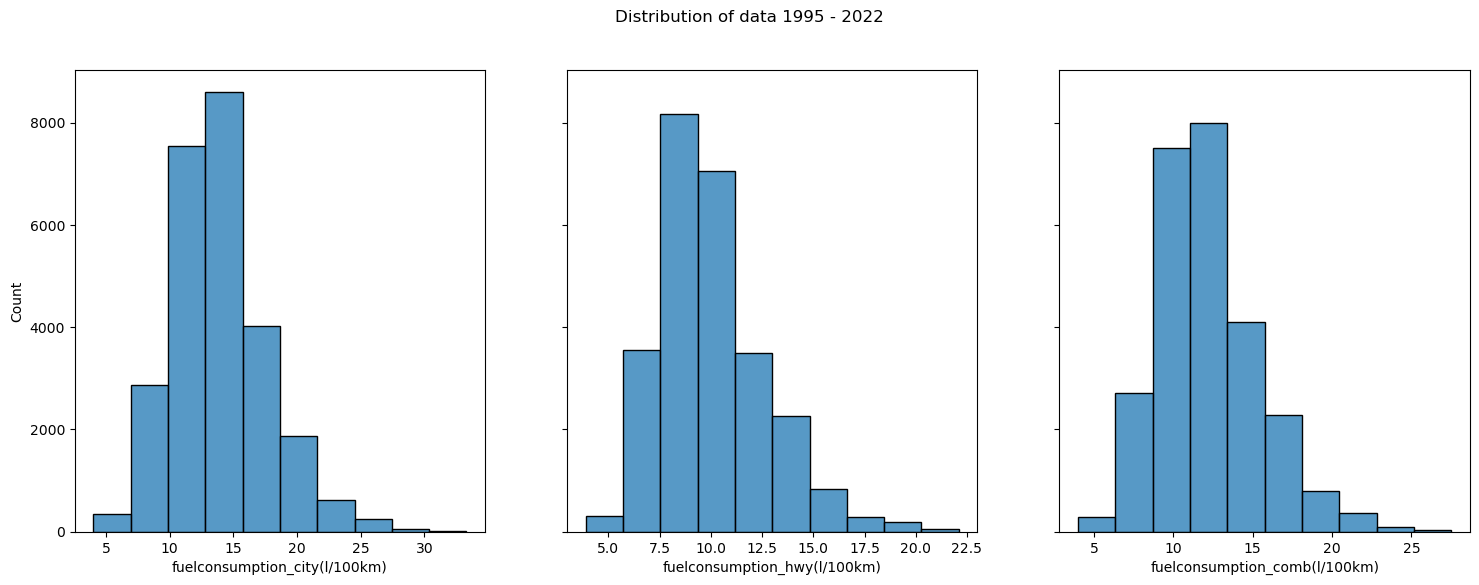

In [35]:

box_plot(master_df,fuel_info,"hist")

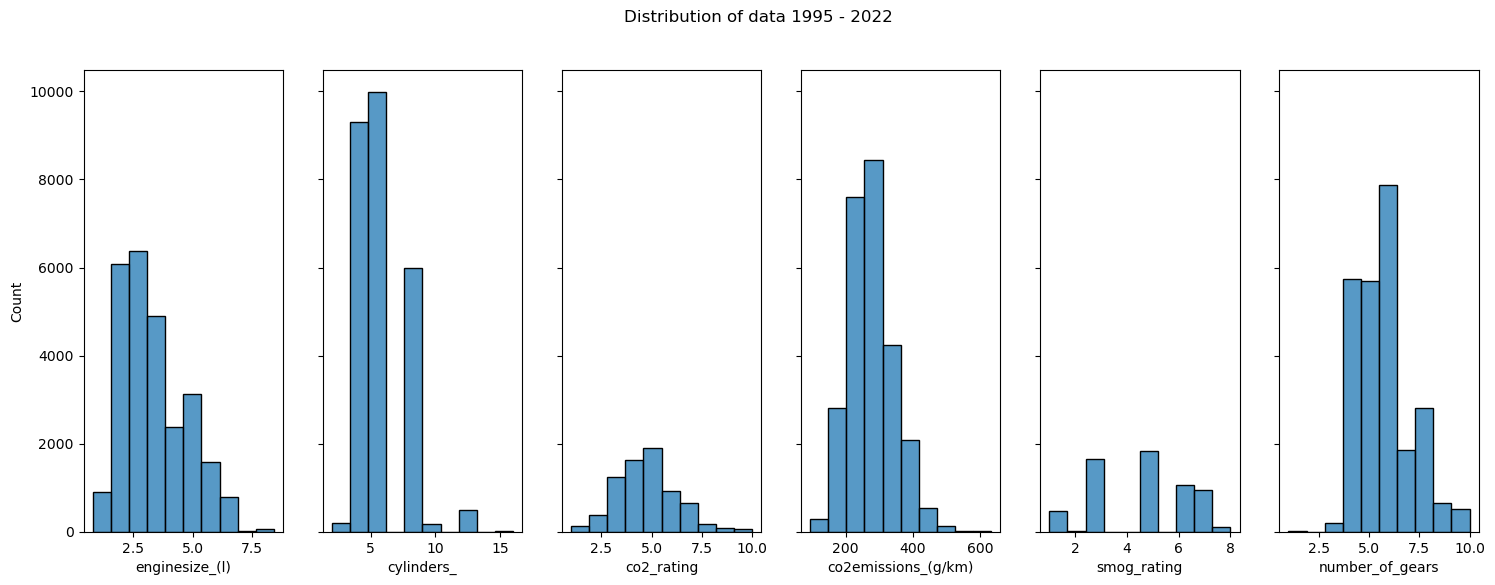

In [37]:
box_plot(master_df,engine_info,'hist')

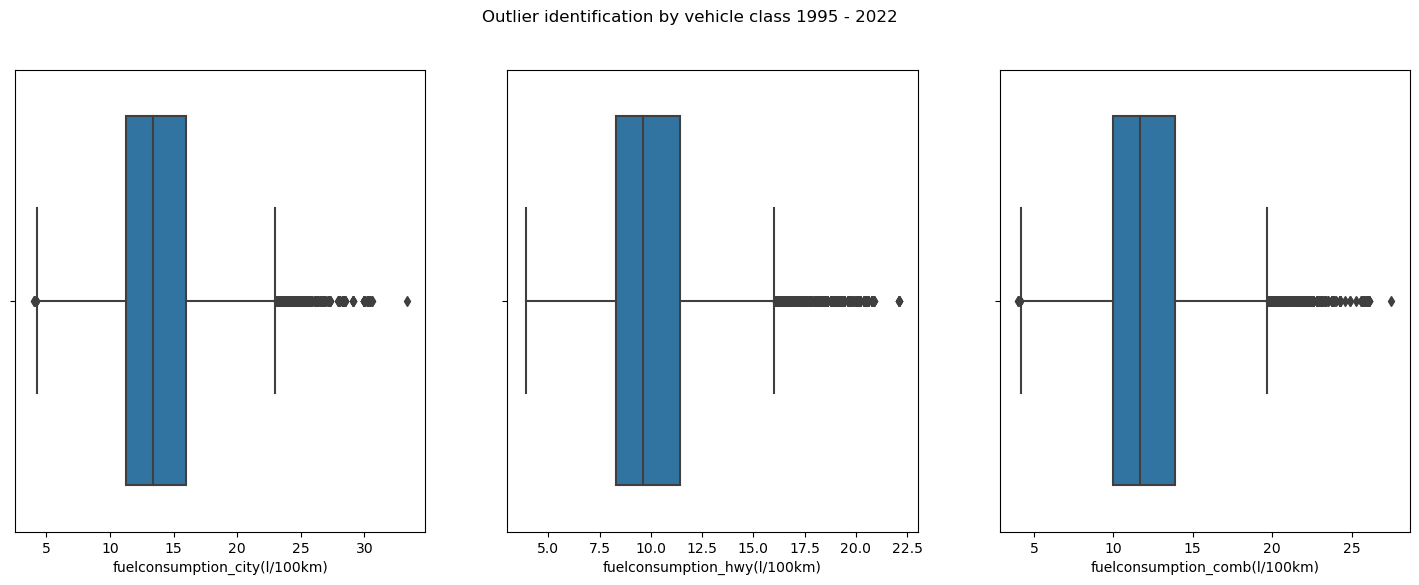

In [36]:
box_plot(master_df,fuel_info,"box")

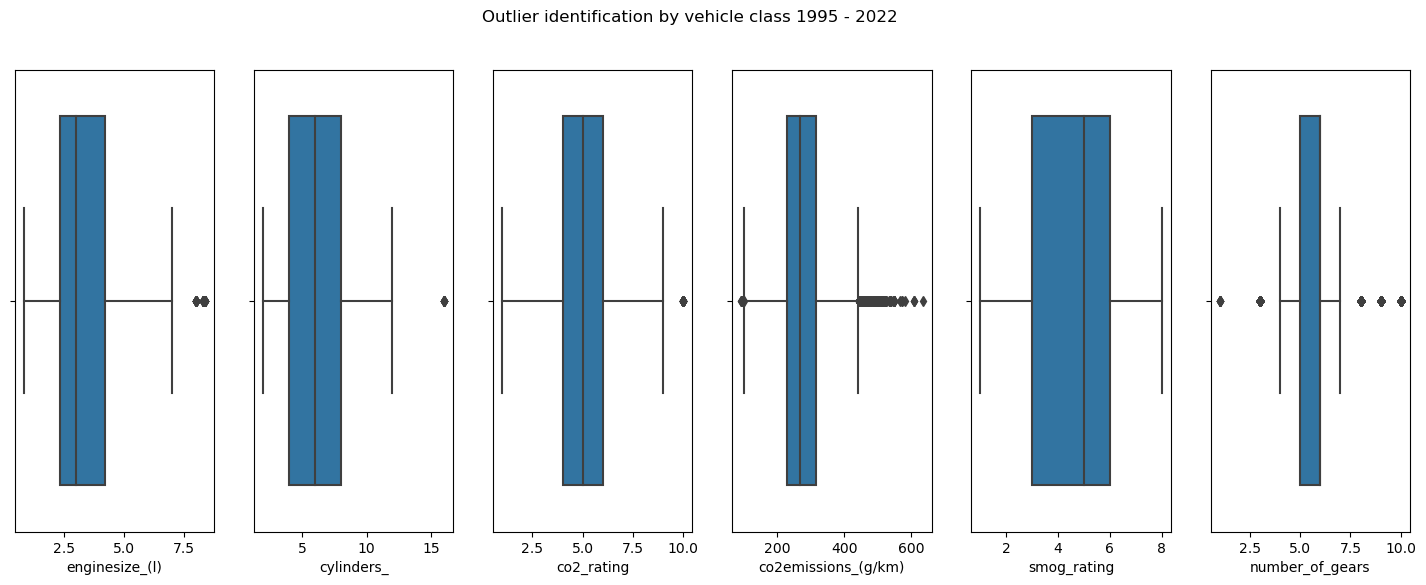

In [38]:
box_plot(master_df,engine_info,'box')

## Correlation analysis

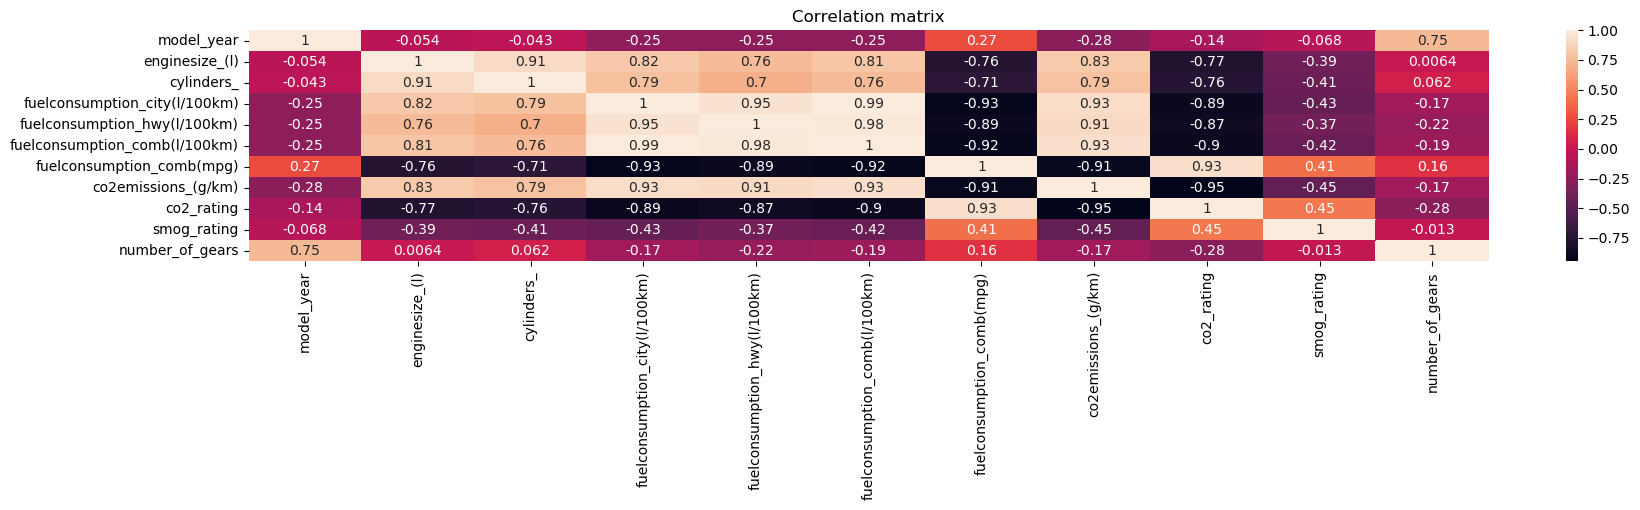

In [39]:
corr_matrix = master_df.corr()
fig_corr = sns.heatmap(corr_matrix, annot=True)
fig_corr.figure.savefig("./plots/correlation_matrix.png") 
plt.title("Correlation matrix")
plt.show()

### Introduce categorical variables in analysis

In [51]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26159 entries, 0 to 26158
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   model_year                     26159 non-null  int64  
 1   make_                          26159 non-null  object 
 2   model.1_                       26159 non-null  object 
 3   vehicleclass_                  26159 non-null  object 
 4   enginesize_(l)                 26159 non-null  float64
 5   cylinders_                     26159 non-null  float64
 6   transmission_                  26159 non-null  object 
 7   fuel_type                      26159 non-null  object 
 8   fuelconsumption_city(l/100km)  26159 non-null  float64
 9   fuelconsumption_hwy(l/100km)   26159 non-null  float64
 10  fuelconsumption_comb(l/100km)  26159 non-null  float64
 11  fuelconsumption_comb(mpg)      26159 non-null  int64  
 12  co2emissions_(g/km)            26159 non-null 

In [96]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedGroupKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer


kf = KFold(n_splits=10)
folds = StratifiedGroupKFold(n_splits=10)

def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [107]:


categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
numerical_preprocessor = StandardScaler()

In [108]:
categorical_columns = ['vehicleclass_','transmission_type','make_','model.1_','mapped_fuel_type','type_of_wheel_drive']
numerical_columns = ['cylinders_','fuelconsumption_city(l/100km)','fuelconsumption_hwy(l/100km)',
                     'fuelconsumption_comb(l/100km)','fuelconsumption_comb(mpg)']
preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_columns),
    ('standard_scaler', numerical_preprocessor, numerical_columns)])

In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

model_l = make_pipeline(preprocessor, LinearRegression())
model_gb =  make_pipeline(preprocessor, GradientBoostingRegressor())

In [117]:
master_df

,model_year,make_,model.1_,vehicleclass_,enginesize_(l),cylinders_,transmission_,fuel_type,fuelconsumption_city(l/100km),fuelconsumption_hwy(l/100km),fuelconsumption_comb(l/100km),fuelconsumption_comb(mpg),co2emissions_(g/km),co2_rating,smog_rating,transmission_type,number_of_gears,mapped_fuel_type,type_of_wheel_drive
0,2022,acura,ilx,compact,2.4,4.0,AM8,Z,9.9,7.0,8.6,33,200,6.0,3.0,automated manual,8.0,premium gasoline,unspecified
1,2022,acura,mdx sh-awd,suv - small,3.5,6.0,AS10,Z,12.6,9.4,11.2,25,263,4.0,5.0,automatic with select Shift,10.0,premium gasoline,All-wheel drive
2,2022,acura,rdx sh-awd,suv - small,2.0,4.0,AS10,Z,11.0,8.6,9.9,29,232,5.0,6.0,automatic with select Shift,10.0,premium gasoline,All-wheel drive
3,2022,acura,rdx sh-awd a-spec,suv - small,2.0,4.0,AS10,Z,11.3,9.1,10.3,27,242,5.0,6.0,automatic with select Shift,10.0,premium gasoline,All-wheel drive
4,2022,acura,tlx sh-awd,compact,2.0,4.0,AS10,Z,11.2,8.0,9.8,29,230,5.0,7.0,automatic with select Shift,10.0,premium gasoline,All-wheel drive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26154,1999,volvo,v70 t5 turbo wagon,station wagon - mid-size,2.3,5.0,A4,Z,13.4,9.4,11.6,24,267,NaN,NaN,automatic,4.0,premium gasoline,unspecified
26155,1999,volvo,v70 t5 turbo wagon,station wagon - mid-size,2.3,5.0,M5,Z,13.4,9.4,11.6,24,267,NaN,NaN,manual,5.0,premium gasoline,unspecified
26156,1999,volvo,v70 wagon,station wagon - mid-size,2.4,5.0,A4,Z,13.1,9.1,11.3,25,260,NaN,NaN,automatic,4.0,premium gasoline,unspecified
26157,1999,volvo,v70 wagon,station wagon - mid-size,2.4,5.0,M5,Z,12.7,9.0,11.0,26,253,NaN,NaN,manual,5.0,premium gasoline,unspecified


In [110]:
non_na_rating = master_df[~master_df['co2_rating'].isna()]

In [111]:
Y = non_na_rating['co2emissions_(g/km)']

X = non_na_rating[['vehicleclass_','transmission_type','make_','model.1_','mapped_fuel_type','type_of_wheel_drive',
              'cylinders_','fuelconsumption_city(l/100km)','fuelconsumption_hwy(l/100km)',
                     'fuelconsumption_comb(l/100km)']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [112]:
__lr = model_l.fit(X_train, y_train)

In [113]:
__lr.score(X_test, y_test)

0.9965703065086772

In [114]:
lr_sc = []
sv_sc = []
for train_index, test_index in kf.split(X):
    X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index],\
                                        Y.iloc[train_index], Y.iloc[test_index] 
    lr_sc.append(get_score(model_l, X_train, X_test, y_train, y_test))
    
    ### NEED TO REVIEW https://scikit-learn.org/stable/modules/preprocessing.html
    sv_sc.append(get_score(model_gb, X_train, X_test, y_train, y_test))

In [115]:
lr_sc

[0.9983236632402283,
 0.9976745505179102,
 0.9990440430424763,
 0.9983354130269798,
 0.9976245961603618,
 0.9982795287593648,
 0.9985319804474508,
 0.9965122627040474,
 0.9945704243972484,
 0.9952241319218016]

In [116]:
sv_sc

[0.99804340380304,
 0.9980047169696271,
 0.9988692508544417,
 0.9988873286061153,
 0.9983497044885975,
 0.9988387709122953,
 0.9984464426287253,
 0.9960868282499651,
 0.9922355530839602,
 0.9966938873392035]